**Importing essential libraries and packages**

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords') 
nltk.download('wordnet')
import numpy as np
import pandas as pd
import sklearn as sc
from sklearn.model_selection import train_test_split
import re, random
from nltk import word_tokenize, sent_tokenize, pos_tag
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import string
import copy
from sklearn.linear_model import LogisticRegression
import pickle

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


**Evaluation function**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from mlxtend.plotting import plot_confusion_matrix

def analysis(labels,predictions):
  print("\nClassification Report: \n",classification_report(labels,predictions,target_names=['positive','negative']))
  print("\nAccuracy: \n",accuracy_score(labels,predictions))
  conf_mat = confusion_matrix(labels,predictions)
  print("\nConfusion Matrix: \n",plot_confusion_matrix(conf_mat,colorbar=True,show_absolute=True,show_normed=True))

**Read Csv file and extract comments and sentiments(labels) seperatably into different variables**

In [ ]:
raw = pd.read_csv('./drive/MyDrive/ml/dataset.csv')
raw_comment = raw[['comment']].copy()
raw_sentiment = raw[['sentiment']].copy()

**1.2) Preprocessing Phase** <br>
1- converting text to lowercase <br>
2- removing numbers from text <br>
3- removing punctuations <br>
4- removing whitespace <br>
5- tokenization <br>
*6- removing stop words <br>
*7- stemming <br>
*8- lemmatization

In [ ]:
def simple_preproc(raw_commentt):
  cm_simple_preproc = copy.deepcopy(raw_commentt)
  #1
  cm_simple_preproc['comment'] = cm_simple_preproc['comment'].str.lower()
  #2
  cm_simple_preproc['comment'] = cm_simple_preproc['comment'].str.replace('\d+', '')
  #3
  cm_simple_preproc['comment'] = cm_simple_preproc['comment'].str.replace('[^\w\s]','')
  #4
  cm_simple_preproc['comment'] = cm_simple_preproc['comment'].str.strip()
  #5
  cm_simple_preproc['tokenized'] = cm_simple_preproc.apply(lambda row: word_tokenize(row['comment']), axis=1)
  #return result
  return cm_simple_preproc

def advance_preproc(raw_commentt):
  cm_advance_preproc = copy.deepcopy(raw_commentt)
  #1
  cm_advance_preproc['comment'] = cm_advance_preproc['comment'].str.lower()
  #2
  cm_advance_preproc['comment'] = cm_advance_preproc['comment'].str.replace('\d+', '')
  #3
  cm_advance_preproc['comment'] = cm_advance_preproc['comment'].str.replace('[^\w\s]','')
  #4
  cm_advance_preproc['comment'] = cm_advance_preproc['comment'].str.strip()
  #5
  cm_advance_preproc['tokenized'] = cm_advance_preproc.apply(lambda row: word_tokenize(row['comment']), axis=1)
  #6
  stop = stopwords.words('english')
  cm_advance_preproc['tokenized'] = cm_advance_preproc['tokenized'].apply(lambda x: [item for item in x if item not in stop])
  #7
  stemmer= PorterStemmer()
  cm_advance_preproc['tokenized_stem'] = cm_advance_preproc['tokenized'].apply(lambda x: [stemmer.stem(y) for y in x])
  #8
  lemmatizer = nltk.stem.WordNetLemmatizer()
  cm_advance_preproc['tokenized'] = cm_advance_preproc['tokenized'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
  #return result
  return cm_advance_preproc

In [ ]:
raw_sentiment.replace("positive",1,True)
raw_sentiment.replace("negative",0,True)

**3.1) Applying Preprocess functions to comments and make embedds of them by using BOW method(countvectorizer) and apply learning methods**

preprocessing

In [ ]:
cm_simple_preproc = simple_preproc(raw_comment)
cm_advance_preproc = advance_preproc(raw_comment)

In [ ]:
Y = np.ravel(raw_sentiment)

logistic regression on data without preprocessing 1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



Classification Report: 
               precision    recall  f1-score   support

    positive       0.86      0.85      0.86      4493
    negative       0.85      0.87      0.86      4507

    accuracy                           0.86      9000
   macro avg       0.86      0.86      0.86      9000
weighted avg       0.86      0.86      0.86      9000


Accuracy: 
 0.8584444444444445

Confusion Matrix: 
 (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb16ee35ad0>)


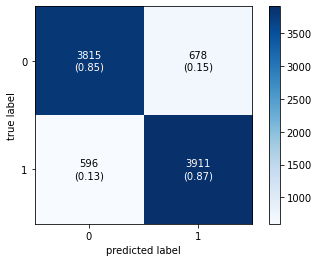

In [ ]:
vectorizer = CountVectorizer(
    lowercase=False,
    max_features = 1000,
)
X_none = vectorizer.fit_transform(raw_comment.comment)
X_none = X_none.todense()
X_train, X_val, Y_train, Y_val = train_test_split(X_none, Y, test_size=0.2, random_state=1)
LR_bow_none_1 = LogisticRegression(solver='saga').fit(X_train,Y_train,sample_weight=None)
predict_label = LR_bow_none_1.predict(X_val)
analysis(Y_val,predict_label)

logistic regression on data without preprocessing 2

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



Classification Report: 
               precision    recall  f1-score   support

    positive       0.87      0.85      0.86      4493
    negative       0.85      0.87      0.86      4507

    accuracy                           0.86      9000
   macro avg       0.86      0.86      0.86      9000
weighted avg       0.86      0.86      0.86      9000


Accuracy: 
 0.8584444444444445

Confusion Matrix: 
 (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb16ef34a90>)


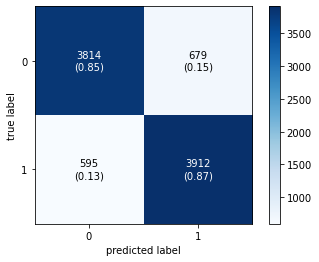

In [ ]:
LR_bow_none_2 = LogisticRegression(solver='saga',C=1.1).fit(X_train,Y_train,sample_weight=None)
predict_label = LR_bow_none_2.predict(X_val)
analysis(Y_val,predict_label)

logistic regression on simple preprocessing data 1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



Classification Report: 
               precision    recall  f1-score   support

    positive       0.86      0.85      0.86      4493
    negative       0.85      0.87      0.86      4507

    accuracy                           0.86      9000
   macro avg       0.86      0.86      0.86      9000
weighted avg       0.86      0.86      0.86      9000


Accuracy: 
 0.8584444444444445

Confusion Matrix: 
 (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb1669a17d0>)


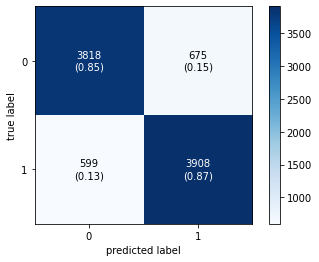

In [ ]:
def dummy(doc):
    return doc

cv = CountVectorizer(
        tokenizer=dummy,
        preprocessor=dummy,
        max_features = 1000,
    )


X_simple = cv.fit_transform(cm_simple_preproc.tokenized)
X_simple = X_simple.todense()
X_train, X_val, Y_train, Y_val = train_test_split(X_simple, Y, test_size=0.2, random_state=1)
LR_bow_simple_1 = LogisticRegression(solver='saga').fit(X_train,Y_train,sample_weight=None)
predict_label = LR_bow_simple_1.predict(X_val)
analysis(Y_val,predict_label)

logistic regression on simple preprocessing data 2

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



Classification Report: 
               precision    recall  f1-score   support

    positive       0.86      0.85      0.86      4493
    negative       0.85      0.87      0.86      4507

    accuracy                           0.86      9000
   macro avg       0.86      0.86      0.86      9000
weighted avg       0.86      0.86      0.86      9000


Accuracy: 
 0.8584444444444445

Confusion Matrix: 
 (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb16ed8dad0>)


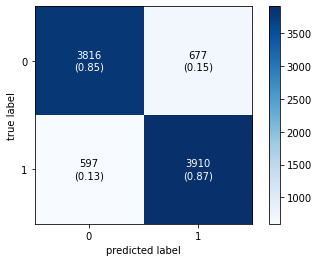

In [ ]:
LR_bow_simple_2 = LogisticRegression(solver='saga',C=0.08).fit(X_train,Y_train,sample_weight=None)
predict_label = LR_bow_simple_2.predict(X_val)
analysis(Y_val,predict_label)

logistic regression on advance preprocessing data 1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



Classification Report: 
               precision    recall  f1-score   support

    positive       0.87      0.85      0.86      4493
    negative       0.85      0.87      0.86      4507

    accuracy                           0.86      9000
   macro avg       0.86      0.86      0.86      9000
weighted avg       0.86      0.86      0.86      9000


Accuracy: 
 0.8592222222222222

Confusion Matrix: 
 (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb16f4200d0>)


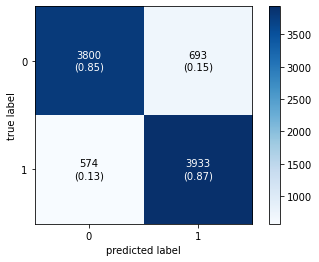

In [ ]:
X_advance = cv.fit_transform(cm_advance_preproc.tokenized)
X_advance = X_advance.todense()
X_train, X_val, Y_train, Y_val = train_test_split(X_advance, Y, test_size=0.2, random_state=1)
LR_bow_advance_1 = LogisticRegression(solver='saga').fit(X_train,Y_train,sample_weight=None)
predict_label = LR_bow_advance_1.predict(X_val)
analysis(Y_val,predict_label)

logistic regression on advance preprocessing data 2

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



Classification Report: 
               precision    recall  f1-score   support

    positive       0.87      0.85      0.86      4493
    negative       0.85      0.87      0.86      4507

    accuracy                           0.86      9000
   macro avg       0.86      0.86      0.86      9000
weighted avg       0.86      0.86      0.86      9000


Accuracy: 
 0.8593333333333333

Confusion Matrix: 
 (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb16f3d10d0>)


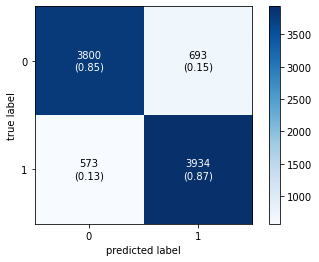

In [ ]:
LR_bow_advance_2 = LogisticRegression(solver='saga',C=0.7).fit(X_train,Y_train,sample_weight=None)
predict_label = LR_bow_advance_2.predict(X_val)
analysis(Y_val,predict_label)

KNN on data without preprocessing 1


Classification Report: 
               precision    recall  f1-score   support

    positive       0.65      0.51      0.57      4493
    negative       0.60      0.73      0.66      4507

    accuracy                           0.62      9000
   macro avg       0.62      0.62      0.61      9000
weighted avg       0.62      0.62      0.61      9000


Accuracy: 
 0.6182222222222222

Confusion Matrix: 
 (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb16f7f23d0>)


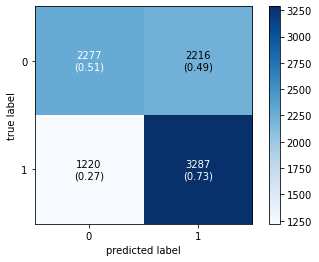

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_bow_none_1 = KNeighborsClassifier()
X_train, X_val, Y_train, Y_val = train_test_split(X_none, Y, test_size=0.2, random_state=1)
KNN_bow_none_1.fit(X_train, Y_train)
predict_label = KNN_bow_none_1.predict(X_val)
analysis(Y_val,predict_label)

KNN on data without preprocessing 2


Classification Report: 
               precision    recall  f1-score   support

    positive       0.73      0.49      0.59      4493
    negative       0.62      0.82      0.70      4507

    accuracy                           0.66      9000
   macro avg       0.67      0.66      0.65      9000
weighted avg       0.67      0.66      0.65      9000


Accuracy: 
 0.6565555555555556

Confusion Matrix: 
 (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb16f8fefd0>)


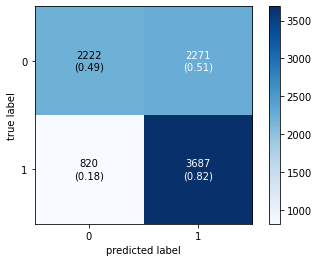

In [ ]:
KNN_bow_none_2 = KNeighborsClassifier(n_neighbors=100,weights='uniform')
KNN_bow_none_2.fit(X_train, Y_train)
predict_label = KNN_bow_none_2.predict(X_val)
analysis(Y_val,predict_label)

KNN on simple preprocessing data 1


Classification Report: 
               precision    recall  f1-score   support

    positive       0.65      0.52      0.58      4493
    negative       0.60      0.72      0.66      4507

    accuracy                           0.62      9000
   macro avg       0.62      0.62      0.62      9000
weighted avg       0.62      0.62      0.62      9000


Accuracy: 
 0.62

Confusion Matrix: 
 (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb16fb04490>)


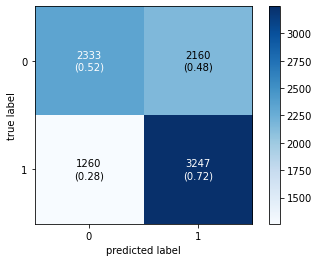

In [ ]:
KNN_bow_simple_1 = KNeighborsClassifier()
X_train, X_val, Y_train, Y_val = train_test_split(X_simple, Y, test_size=0.2, random_state=1)
KNN_bow_simple_1.fit(X_train, Y_train)
predict_label = KNN_bow_simple_1.predict(X_val)
analysis(Y_val,predict_label)

KNN on simple preprocessing data 2


Classification Report: 
               precision    recall  f1-score   support

    positive       0.75      0.50      0.60      4493
    negative       0.62      0.83      0.71      4507

    accuracy                           0.67      9000
   macro avg       0.69      0.67      0.66      9000
weighted avg       0.69      0.67      0.66      9000


Accuracy: 
 0.6658888888888889

Confusion Matrix: 
 (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb16fd05bd0>)


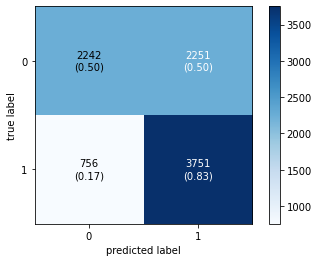

In [ ]:
KNN_bow_simple_2 = KNeighborsClassifier(n_neighbors=100,weights='uniform')
KNN_bow_simple_2.fit(X_train, Y_train)
predict_label = KNN_bow_simple_2.predict(X_val)
analysis(Y_val,predict_label)

KNN on advance preprocessing data 1


Classification Report: 
               precision    recall  f1-score   support

    positive       0.63      0.64      0.64      4493
    negative       0.64      0.63      0.63      4507

    accuracy                           0.64      9000
   macro avg       0.64      0.64      0.63      9000
weighted avg       0.64      0.64      0.63      9000


Accuracy: 
 0.635

Confusion Matrix: 
 (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb16fda2250>)


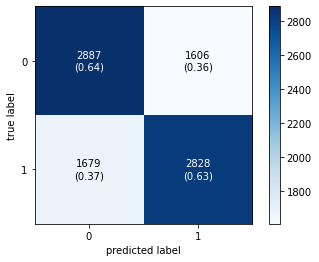

In [ ]:
KNN_bow_advance_1 = KNeighborsClassifier()
X_train, X_val, Y_train, Y_val = train_test_split(X_advance, Y, test_size=0.2, random_state=1)
KNN_bow_advance_1.fit(X_train, Y_train)
predict_label = KNN_bow_advance_1.predict(X_val)
analysis(Y_val,predict_label)

KNN on advance preprocessing data 2


Classification Report: 
               precision    recall  f1-score   support

    positive       0.72      0.64      0.68      4493
    negative       0.68      0.76      0.72      4507

    accuracy                           0.70      9000
   macro avg       0.70      0.70      0.70      9000
weighted avg       0.70      0.70      0.70      9000


Accuracy: 
 0.698

Confusion Matrix: 
 (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb16ff4e790>)


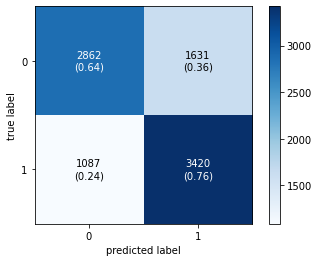

In [ ]:
KNN_bow_advance_2 = KNeighborsClassifier(n_neighbors=100,weights='uniform')
KNN_bow_advance_2.fit(X_train, Y_train)
predict_label = KNN_bow_advance_2.predict(X_val)
analysis(Y_val,predict_label)

SVM on data without preprocessing 1


Classification Report: 
               precision    recall  f1-score   support

    positive       0.86      0.83      0.85      4493
    negative       0.84      0.87      0.85      4507

    accuracy                           0.85      9000
   macro avg       0.85      0.85      0.85      9000
weighted avg       0.85      0.85      0.85      9000


Accuracy: 
 0.8517777777777777

Confusion Matrix: 
 (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb17001d190>)


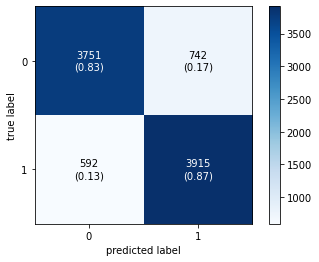

In [ ]:
from sklearn import svm
SVM_bow_none_1 = svm.SVC()
X_train, X_val, Y_train, Y_val = train_test_split(X_none, Y, test_size=0.2, random_state=1)
SVM_bow_none_1.fit(X_train,Y_train)
predict_label = SVM_bow_none_1.predict(X_val)
analysis(Y_val,predict_label)

SVM on data without preprocessing 2


Classification Report: 
               precision    recall  f1-score   support

    positive       0.69      0.64      0.66      4493
    negative       0.67      0.71      0.69      4507

    accuracy                           0.68      9000
   macro avg       0.68      0.68      0.68      9000
weighted avg       0.68      0.68      0.68      9000


Accuracy: 
 0.6764444444444444

Confusion Matrix: 
 (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb1700142d0>)


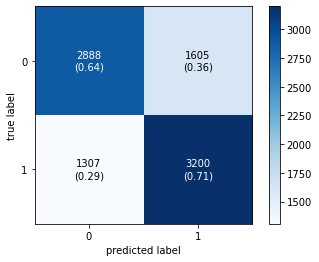

In [ ]:
SVM_bow_none_2 = svm.SVC(C=0.01)
SVM_bow_none_2.fit(X_train,Y_train)
predict_label = SVM_bow_none_2.predict(X_val)
analysis(Y_val,predict_label)

SVM on simple preprocessing data 1


Classification Report: 
               precision    recall  f1-score   support

    positive       0.86      0.84      0.85      4493
    negative       0.84      0.87      0.86      4507

    accuracy                           0.85      9000
   macro avg       0.85      0.85      0.85      9000
weighted avg       0.85      0.85      0.85      9000


Accuracy: 
 0.8531111111111112

Confusion Matrix: 
 (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f1a36787b10>)


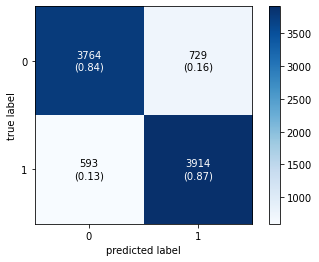

In [ ]:
SVM_bow_simple_1 = svm.SVC()
X_train, X_val, Y_train, Y_val = train_test_split(X_simple, Y, test_size=0.2, random_state=1)
SVM_bow_simple_1.fit(X_train,Y_train)
predict_label = SVM_bow_simple_1.predict(X_val)
analysis(Y_val,predict_label)

SVM on advance preprocessing data 1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



Classification Report: 
               precision    recall  f1-score   support

    positive       0.87      0.85      0.86      4493
    negative       0.85      0.87      0.86      4507

    accuracy                           0.86      9000
   macro avg       0.86      0.86      0.86      9000
weighted avg       0.86      0.86      0.86      9000


Accuracy: 
 0.8594444444444445

Confusion Matrix: 
 (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f6a9cc795d0>)


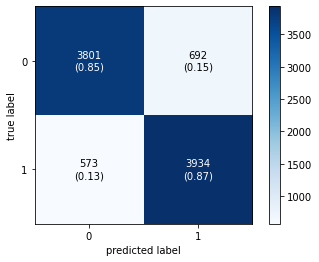

In [ ]:
SVM_bow_advance_1 = svm.SVC()
X_train, X_val, Y_train, Y_val = train_test_split(X_advance, Y, test_size=0.2, random_state=1)
SVM_bow_advance_1.fit(X_train,Y_train)
predict_label = SVM_bow_advance_1.predict(X_val)
analysis(Y_val,predict_label)

SVM on advance preprocessing data 2


Classification Report: 
               precision    recall  f1-score   support

    positive       0.80      0.59      0.68      4493
    negative       0.67      0.85      0.75      4507

    accuracy                           0.72      9000
   macro avg       0.74      0.72      0.71      9000
weighted avg       0.74      0.72      0.71      9000


Accuracy: 
 0.7194444444444444

Confusion Matrix: 
 (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb17022a610>)


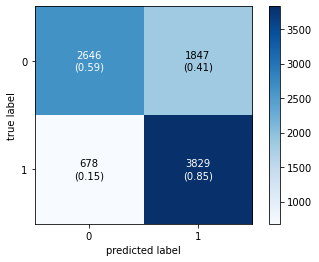

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_advance, Y, test_size=0.2, random_state=1)
SVM_bow_advance_2 = svm.SVC(C=0.01)
SVM_bow_advance_2.fit(X_train,Y_train)
predict_label = SVM_bow_advance_2.predict(X_val)
analysis(Y_val,predict_label)

***3.2) defining word2vec method and function for declaring sentence's vector based on word's vectors in the sentence***

In [ ]:
from gensim.models import word2vec
def make_word2vec(sentence):
    num_features = 250
    min_count = 40
    num_processor = 4
    context = 10
    downsampling = 0.001
    model = word2vec.Word2Vec(sentence, workers = num_processor, size = num_features, min_count = min_count,window = context, sample = downsampling)
    model.init_sims(replace = True)
    model_name = str(num_features)+"features_"+str(min_count)+"minwords"
    model.save(model_name)
    return model
def makeFeatureVec(review, model, num_features): 
    featureVec = np.zeros((num_features,), dtype = "float32")
    word_index = set(model.wv.index2word)
    nword = 0
    for word in review:
        if word in word_index:
            nword += 1
            featureVec = np.add(featureVec, model[word])
    featureVec = np.divide(featureVec, nword)        
    return featureVec

creating word2vec vectorize method on advance preprocessed data

In [ ]:
model = make_word2vec(cm_advance_preproc.tokenized)
output_w2v = []
for comment in cm_advance_preproc.tokenized:
    featureVec = makeFeatureVec(comment,model,250)
    output_w2v.append(featureVec)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Run logistic regression on word2vec data

In [ ]:
X_train ,X_val,Y_train,Y_val= train_test_split(output_w2v,Y,test_size=0.2,random_state=1)


Classification Report: 
               precision    recall  f1-score   support

    positive       0.87      0.86      0.87      4493
    negative       0.86      0.87      0.87      4507

    accuracy                           0.87      9000
   macro avg       0.87      0.87      0.87      9000
weighted avg       0.87      0.87      0.87      9000


Accuracy: 
 0.8668888888888889

Confusion Matrix: 
 (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f056192b210>)


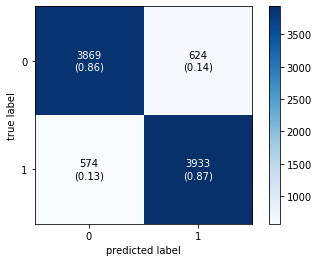

In [ ]:
LR_w2v_1 = LogisticRegression(solver='saga',C=1,warm_start=True).fit(X_train,Y_train,sample_weight=None)
predict_label = LR_w2v_1.predict(X_val)
analysis(Y_val,predict_label)

Run KNN on word2vec data


Classification Report: 
               precision    recall  f1-score   support

    positive       0.81      0.87      0.84      4493
    negative       0.86      0.80      0.83      4507

    accuracy                           0.83      9000
   macro avg       0.83      0.83      0.83      9000
weighted avg       0.83      0.83      0.83      9000


Accuracy: 
 0.8332222222222222

Confusion Matrix: 
 (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb1729f57d0>)


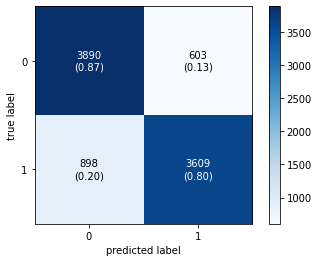

In [ ]:
KNN_w2v_1 = KNeighborsClassifier(n_neighbors=50)
KNN_w2v_1.fit(X_train, Y_train)
predict_label = KNN_w2v_1.predict(X_val)
analysis(Y_val,predict_label)

Run SVM on word2vec data


Classification Report: 
               precision    recall  f1-score   support

    positive       0.89      0.88      0.88      4493
    negative       0.88      0.89      0.89      4507

    accuracy                           0.88      9000
   macro avg       0.88      0.88      0.88      9000
weighted avg       0.88      0.88      0.88      9000


Accuracy: 
 0.8842222222222222

Confusion Matrix: 
 (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb172bad790>)


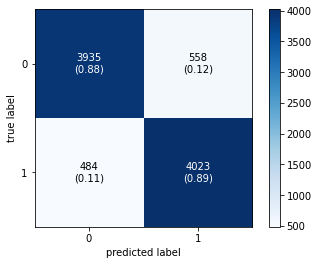

In [ ]:
SVM_w2v_1 = svm.SVC(C=1.28)
SVM_w2v_1.fit(X_train,Y_train)
predict_label = SVM_w2v_1.predict(X_val)
analysis(Y_val,predict_label)

Run MLP on word2vec and advance preprocessing data


Classification Report: 
               precision    recall  f1-score   support

    positive       0.87      0.85      0.86      4493
    negative       0.86      0.87      0.86      4507

    accuracy                           0.86      9000
   macro avg       0.86      0.86      0.86      9000
weighted avg       0.86      0.86      0.86      9000


Accuracy: 
 0.862

Confusion Matrix: 
 (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb172af8610>)


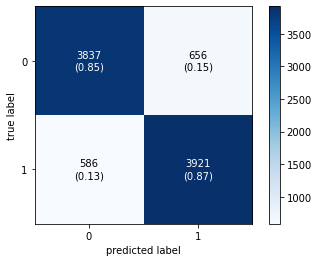

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300,hidden_layer_sizes=(500,200,50,10,)).fit(X_train, Y_train)
predict_label = clf.predict(X_val)
analysis(Y_val,predict_label)

Save best models in all scenarios

In [ ]:
filename = 'LR.pkl'
pickle.dump(LR_w2v_1, open(filename, 'wb'))

#filename2 = 'kNN.pkl'
#pickle.dump(KNN_w2v_1, open(filename2, 'wb'))

#filename3 = 'SVM.pkl'
#pickle.dump(SVM_w2v_1, open(filename3, 'wb'))

filename4 = 'best.pkl'
pickle.dump(LR_w2v_1, open(filename4, 'wb'))